In [1]:
# Create dictionaries to store user and product information
users = {}
products = {}

# Read the data file and extract user and product information
with open("train.txt", 'r') as file:
    for line in file:
        parts = line.strip().split(', ')
        user_id = int(parts[0].split(' ')[1])
        product_id = int(parts[1].split(' ')[1])

        # Store user information
        if user_id not in users:
            users[user_id] = True
        
        # Store product information
        if product_id not in products:
            products[product_id] = True

            
total_users = len(users)
total_products = len(products)

print("Total Number of Users:", total_users)
print("Total Number of Products:", total_products)


Total Number of Users: 500
Total Number of Products: 100


In [20]:
import pandas as pd

data_file = "train.txt"

# Create a list to store data
data = []

# Read the data file and extract ratings, users, and products
with open(data_file, 'r') as file:
    for line in file:
        parts = line.strip().split(', ')
        user_id = int(parts[0].split(' ')[1])
        product_id = int(parts[1].split(' ')[1])
        
        # Extract the rating by removing the parentheses and converting to float
        rating = float(parts[2].split(' ')[1][:-1])  # Remove the last character (')')

        data.append([user_id, product_id, rating])

# Create a DataFrame
Y = pd.DataFrame(data, columns=['User', 'Product', 'Rating'])

# Print the dimensions of the DataFrame
num_rows, num_columns = Y.shape
print("Dimensions of Y:", num_rows, "rows x", num_columns, "columns")
Y

Dimensions of Y: 31763 rows x 3 columns


,User,Product,Rating
0,88803,22577,0.0
1,88803,20520,4.0
2,88803,91820,1.0
3,88803,45584,7.0
4,88803,98857,6.0
...,...,...,...
31758,18073,42251,9.0
31759,18073,16062,10.0
31760,18073,43306,1.0
31761,18073,23634,0.0


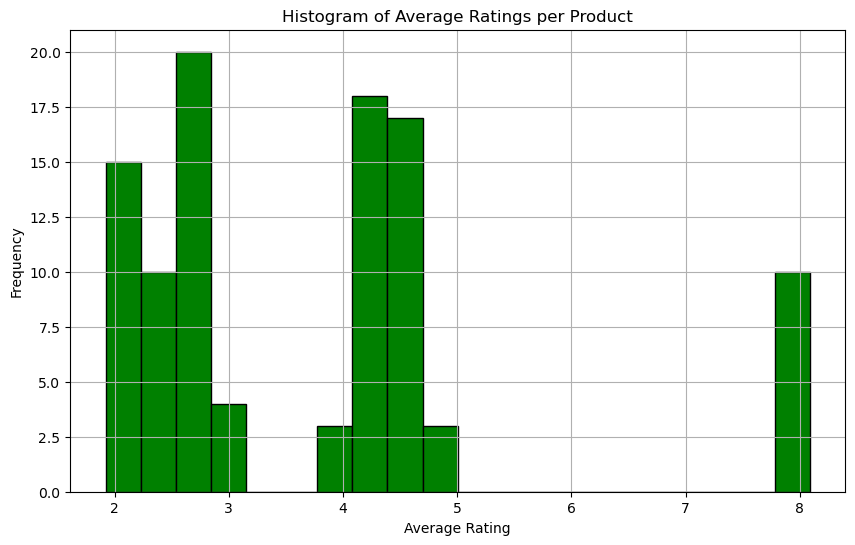

Product
123      2.779264
1208     4.123711
1785     2.654237
1855     4.103774
2114     4.259259
           ...   
91484    2.575342
91736    4.530201
91820    2.781879
98071    4.215753
98857    3.986207
Name: Rating, Length: 100, dtype: float64


In [25]:
import matplotlib.pyplot as plt

# Calculate the average rating for each product
AR = Y.groupby('Product')['Rating'].mean()

# Create a histogram of average ratings
plt.figure(figsize=(10, 6))
plt.hist(AR, bins=20, color='green', edgecolor='black')

plt.title('Histogram of Average Ratings per Product')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

print(average_ratings)

In [27]:
# Find the 5 worst products based on average ratings
wp = average_ratings.nsmallest(5)

# Print the 5 worst products
print("5 Worst Products based on Average Ratings:")
for product_id, AR in wp.iteritems():
    print(f"Product {product_id}: Average Rating {AR:.3f}")

5 Worst Products based on Average Ratings:
Product 56033: Average Rating 1.921
Product 72533: Average Rating 1.955
Product 22577: Average Rating 1.977
Product 16430: Average Rating 2.013
Product 60751: Average Rating 2.034


C:\Users\cg\AppData\Local\Temp\ipykernel_9064\2808210128.py:6: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for product_id, AR in wp.iteritems():


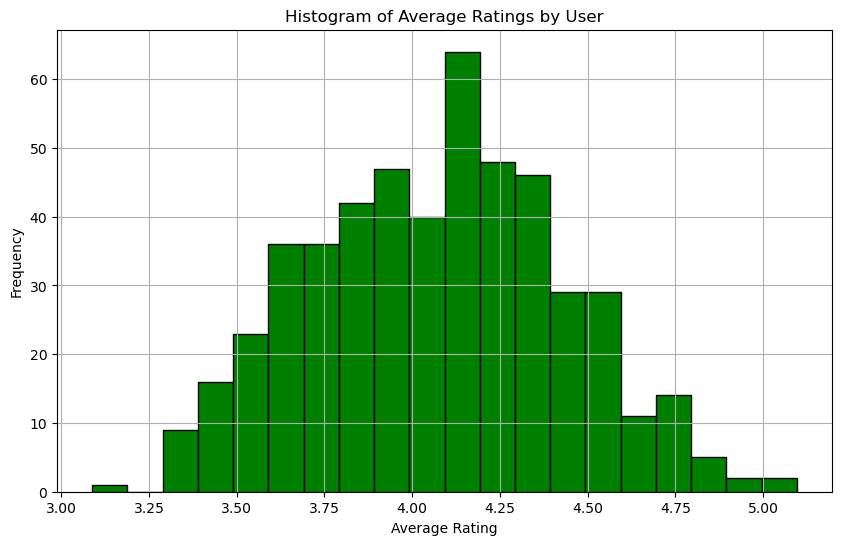

In [29]:
# Create a DataFrame
Y = pd.DataFrame(data, columns=['User', 'Product', 'Rating'])

# Calculate the average rating given by each user
average_ratings_by_user = Y.groupby('User')['Rating'].mean()

# Create a histogram of average ratings by user
plt.figure(figsize=(10, 6))
plt.hist(average_ratings_by_user, bins=20, color='green', edgecolor='black')

plt.title('Histogram of Average Ratings by User')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()



In [6]:
import pandas as pd

data_file = "train.txt"

# Create a list to store data
data = []

# Read the data file and extract ratings, users, and products
with open(data_file, 'r') as file:
    for line in file:
        parts = line.strip().split(', ')
        user_id = int(parts[0].split(' ')[1])
        product_id = int(parts[1].split(' ')[1])
        rating = float(parts[2].split(' ')[1][:-1])  # Remove the last character (')')

        data.append([user_id, product_id, rating])

# Create a DataFrame
Y = pd.DataFrame(data, columns=['User', 'Product', 'Rating'])

# Calculate the average rating given by each user
average_ratings_by_user = Y.groupby('User')['Rating'].mean()

# Find the 5 most generous users based on average ratings
most_generous_users = average_ratings_by_user.nlargest(5)

# Print the 5 most generous users
print("5 Most Generous Users based on Average Ratings:")
for user_id, avg_rating in most_generous_users.iteritems():
    print(f"User {user_id}: Average Rating {avg_rating:.2f}")


5 Most Generous Users based on Average Ratings:
User 31410: Average Rating 5.10
User 73310: Average Rating 5.06
User 97887: Average Rating 4.90
User 77730: Average Rating 4.90
User 20146: Average Rating 4.89


C:\Users\cg\AppData\Local\Temp\ipykernel_9064\506184095.py:29: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for user_id, avg_rating in most_generous_users.iteritems():


In [7]:

test_data_file = "test.txt"

# Read the test data file
test_data = pd.read_csv(test_data_file, sep=', ', engine='python', header=None, names=['User', 'Product', 'Rating'])

# Identify the total number of users and products in the test data
total_users_test = test_data['User'].nunique()
total_products_test = test_data['Product'].nunique()

print("Total Number of Users in Test Data:", total_users_test)
print("Total Number of Products in Test Data:", total_products_test)


Total Number of Users in Test Data: 421
Total Number of Products in Test Data: 2


In [14]:

test_data_file = "train.txt"

# Read the test data file
test_data = pd.read_csv(test_data_file, sep=', ', engine='python', header=None, names=['User', 'Product', 'Rating'])

# Create a DataFrame X
X = test_data.pivot(index='User', columns='Product', values='Rating')

# Print the dimensions of the DataFrame X
num_rows_X, num_columns_X = X.shape
print("Dimensions of X:", num_rows_X, "rows x", num_columns_X, "columns")
X

Dimensions of X: 500 rows x 100 columns


Product,Product 11035,Product 1208,Product 123,Product 13634,Product 14247,Product 16062,Product 16342,Product 16430,Product 1785,Product 17868,...,Product 84017,Product 85457,Product 86102,Product 88273,Product 88523,Product 91484,Product 91736,Product 91820,Product 98071,Product 98857
User,,,,,,,,,,,,,,,,,,,,,
(User 10051,Rating 0.0),Rating 9.0),NaN,Rating 8.0),Rating 7.0),Rating 0.0),Rating 3.0),Rating 1.0),Rating 2.0),Rating 10.0),...,NaN,NaN,Rating 4.0),Rating 0.0),Rating 4.0),Rating 2.0),NaN,NaN,Rating 8.0),Rating 10.0)
(User 10250,Rating 3.0),Rating 8.0),Rating 3.0),Rating 9.0),Rating 10.0),Rating 0.0),NaN,Rating 0.0),Rating 0.0),Rating 10.0),...,Rating 5.0),NaN,NaN,NaN,Rating 0.0),Rating 1.0),Rating 0.0),NaN,NaN,NaN
(User 10428,Rating 1.0),Rating 2.0),Rating 9.0),Rating 8.0),Rating 6.0),Rating 2.0),NaN,Rating 2.0),Rating 9.0),NaN,...,Rating 1.0),NaN,Rating 2.0),NaN,NaN,Rating 8.0),Rating 1.0),NaN,NaN,Rating 3.0)
(User 10634,Rating 4.0),Rating 9.0),Rating 3.0),Rating 6.0),Rating 8.0),NaN,Rating 2.0),Rating 1.0),NaN,NaN,...,Rating 7.0),NaN,NaN,NaN,Rating 1.0),Rating 0.0),NaN,NaN,Rating 7.0),NaN
(User 10715,NaN,Rating 3.0),Rating 2.0),Rating 9.0),Rating 9.0),NaN,Rating 10.0),Rating 3.0),Rating 1.0),NaN,...,NaN,Rating 3.0),NaN,Rating 1.0),NaN,Rating 0.0),NaN,Rating 0.0),Rating 2.0),Rating 4.0)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
(User 97877,NaN,NaN,Rating 2.0),Rating 7.0),Rating 8.0),Rating 3.0),NaN,Rating 0.0),NaN,NaN,...,NaN,Rating 0.0),Rating 8.0),Rating 3.0),NaN,NaN,Rating 5.0),Rating 2.0),Rating 9.0),NaN
(User 97887,NaN,NaN,Rating 0.0),Rating 8.0),Rating 9.0),Rating 3.0),NaN,Rating 8.0),Rating 6.0),Rating 1.0),...,Rating 2.0),Rating 8.0),NaN,Rating 6.0),NaN,NaN,Rating 6.0),NaN,Rating 4.0),NaN
(User 98352,Rating 2.0),NaN,Rating 3.0),Rating 9.0),Rating 9.0),NaN,Rating 9.0),NaN,Rating 1.0),NaN,...,Rating 1.0),NaN,Rating 5.0),NaN,Rating 1.0),NaN,NaN,NaN,Rating 0.0),Rating 1.0)


Training and evaluating Decision Tree...
Accuracy: 0.87
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.74      0.77       423
           1       0.90      0.93      0.91      1047

    accuracy                           0.87      1470
   macro avg       0.85      0.83      0.84      1470
weighted avg       0.87      0.87      0.87      1470



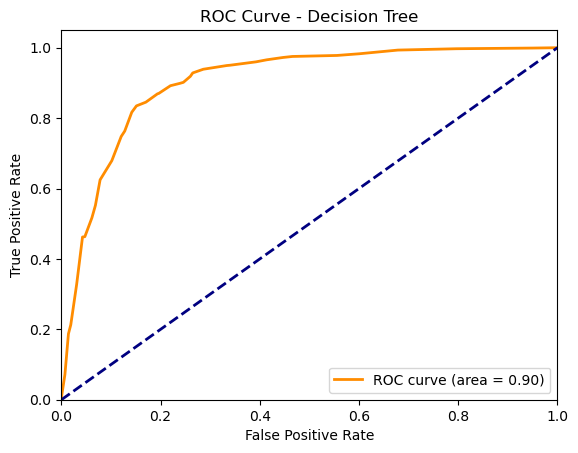

--------------------------------------------------

Training and evaluating Random Forest...
Accuracy: 0.87
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.74      0.77       423
           1       0.90      0.93      0.91      1047

    accuracy                           0.87      1470
   macro avg       0.85      0.83      0.84      1470
weighted avg       0.87      0.87      0.87      1470



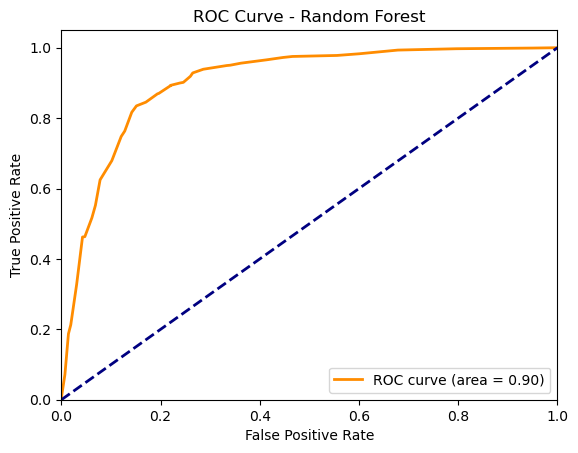

--------------------------------------------------

Training and evaluating Logistic Regression...
Accuracy: 0.87
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.74      0.76       423
           1       0.90      0.92      0.91      1047

    accuracy                           0.87      1470
   macro avg       0.85      0.83      0.84      1470
weighted avg       0.87      0.87      0.87      1470



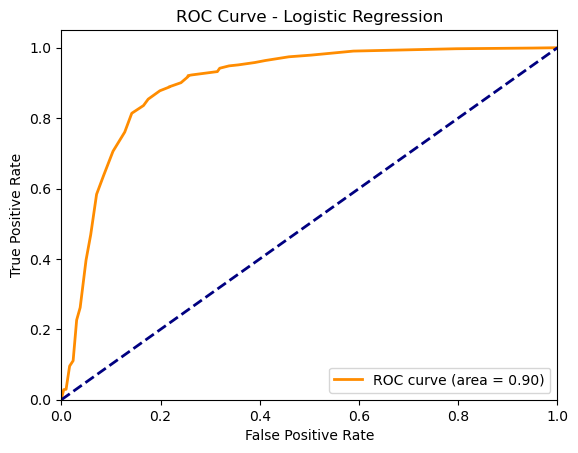

--------------------------------------------------

Training and evaluating Support Vector Machine...
Accuracy: 0.87
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.76      0.78       423
           1       0.91      0.92      0.91      1047

    accuracy                           0.87      1470
   macro avg       0.85      0.84      0.84      1470
weighted avg       0.87      0.87      0.87      1470



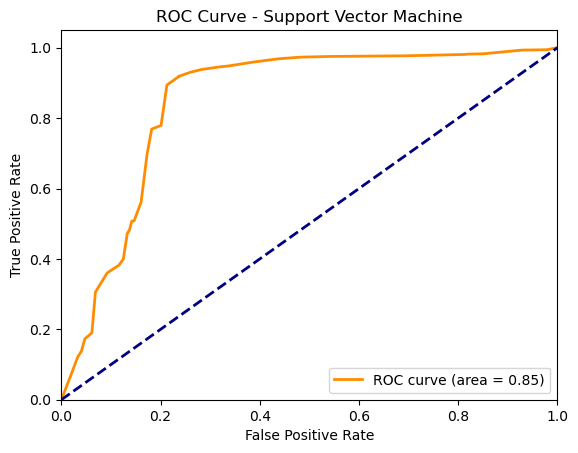

--------------------------------------------------

Training and evaluating k-Nearest Neighbors...
Accuracy: 0.85
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.78      0.75       423
           1       0.91      0.87      0.89      1047

    accuracy                           0.85      1470
   macro avg       0.81      0.83      0.82      1470
weighted avg       0.85      0.85      0.85      1470



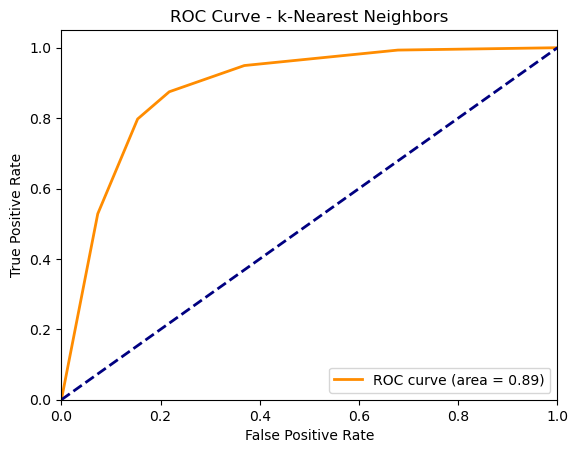

--------------------------------------------------

Training and evaluating Deep Neural Network (PyTorch)...
Accuracy: 0.87
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.75      0.76       423
           1       0.90      0.92      0.91      1047

    accuracy                           0.87      1470
   macro avg       0.84      0.83      0.84      1470
weighted avg       0.87      0.87      0.87      1470

--------------------------------------------------



In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

# Load your dataset (replace 'Group2_Ready.csv' with your actual file path)
data = pd.read_csv('Group2_Ready.csv')

# Encode gender column
data['gender'] = data['gender'].apply(lambda x: 1 if x == 'male' else 0)

# Create a dictionary to map locations to numerical values
location_mapping = {location: index + 1 for index, location in enumerate(data['location'].unique())}

# Apply the mapping to the 'location' column
data['location_encoded'] = data['location'].map(location_mapping)

# Decode 'Class' column
data['Class'] = data['Class'].apply(lambda x: 1 if x == 'Churn=No' else 0)

# Select features and target
features = ['partner', 'survey', 'dependents']
target = 'Class'

X = data[features]
y = data[target]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert data to PyTorch tensors
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train_tensor, X_test_tensor, y_train_tensor, y_test_tensor = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

# Initialize classifiers
classifiers = [
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('Support Vector Machine', SVC(random_state=42, probability=True)),
    ('k-Nearest Neighbors', KNeighborsClassifier(n_neighbors=5)),
    ('Deep Neural Network (PyTorch)', None)  # We'll create the PyTorch model later
]

# Train and evaluate classifiers
for name, clf in classifiers:
    print(f"Training and evaluating {name}...")
    
    if name == 'Deep Neural Network (PyTorch)':
        # Define a deep neural network model using PyTorch
        class DeepModel(nn.Module):
            def __init__(self):
                super(DeepModel, self).__init__()
                self.fc1 = nn.Linear(X_train_tensor.shape[1], 128)
                self.fc2 = nn.Linear(128, 64)
                self.fc3 = nn.Linear(64, 32)
                self.fc4 = nn.Linear(32, 1)
                self.sigmoid = nn.Sigmoid()

            def forward(self, x):
                x = F.relu(self.fc1(x))
                x = F.relu(self.fc2(x))
                x = F.relu(self.fc3(x))
                x = self.sigmoid(self.fc4(x))
                return x
        
        # Instantiate the PyTorch model
        model = DeepModel()
        
        # Define loss function and optimizer
        criterion = nn.BCELoss()  # Binary Cross-Entropy loss
        optimizer = optim.Adam(model.parameters(), lr=0.001)
        
        # Train the model
        num_epochs = 10
        for epoch in range(num_epochs):
            optimizer.zero_grad()  # Zero the gradients
            outputs = model(X_train_tensor)  # Forward pass
            loss = criterion(outputs, y_train_tensor)  # Compute loss
            loss.backward()  # Backpropagation
            optimizer.step()  # Update weights
        
        # Make predictions
        with torch.no_grad():
            y_pred = (model(X_test_tensor) > 0.5).float().numpy()
    else:
        # Train the classifier
        clf.fit(X_train, y_train)
        
        # Make predictions
        y_pred = clf.predict(X_test)
    
    # Evaluate the model/classifier
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:\n", classification_rep)
    
    # Generate ROC curve and calculate AUC
    if name != 'Deep Neural Network (PyTorch)':
        y_probs = clf.predict_proba(X_test)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, y_probs)
        roc_auc = auc(fpr, tpr)

        # Plot ROC curve
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {name}')
        plt.legend(loc="lower right")
        plt.show()
    
    print("--------------------------------------------------\n")

# Training deep learning model using PyTorch and generating ROC curves


In [2]:
import pandas as pd

data = []
with open("train.txt", "r") as file:
    for line in file:
        parts = line.strip().split(",")
        user = int(parts[0].split()[1])
        product = int(parts[1].split()[1])
        rating = float(parts[2].split()[1].rstrip(')'))  # Remove the trailing parenthesis
        data.append((user, product, rating))

df = pd.DataFrame(data, columns=["User", "Product", "Rating"])

total_users = df["User"].nunique()
total_products = df["Product"].nunique()

print("Total Users:", total_users)
print("Total Products:", total_products)

Y = df.pivot(index="User", columns="Product", values="Rating")
Y_array = Y.to_numpy()

print("Dimensions of Y:", Y.shape)
Y

Total Users: 500
Total Products: 100
Dimensions of Y: (500, 100)


Product,123,1208,1785,1855,2114,2811,5351,5871,7230,7343,...,84017,85457,86102,88273,88523,91484,91736,91820,98071,98857
User,,,,,,,,,,,,,,,,,,,,,
76,NaN,9.0,NaN,8.0,3.0,4.0,9.0,7.0,NaN,6.0,...,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
287,NaN,NaN,6.0,NaN,NaN,NaN,NaN,1.0,NaN,8.0,...,4.0,0.0,NaN,NaN,8.0,NaN,0.0,6.0,2.0,0.0
337,NaN,NaN,3.0,0.0,0.0,1.0,3.0,1.0,0.0,8.0,...,NaN,4.0,2.0,NaN,NaN,NaN,NaN,0.0,NaN,3.0
707,9.0,NaN,NaN,2.0,3.0,8.0,NaN,NaN,NaN,8.0,...,NaN,3.0,1.0,3.0,9.0,6.0,1.0,9.0,NaN,1.0
807,1.0,6.0,2.0,5.0,7.0,2.0,8.0,4.0,NaN,10.0,...,NaN,0.0,10.0,0.0,0.0,NaN,NaN,NaN,7.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97877,2.0,NaN,NaN,9.0,NaN,1.0,8.0,8.0,NaN,7.0,...,NaN,0.0,8.0,3.0,NaN,NaN,5.0,2.0,9.0,NaN
97887,0.0,NaN,6.0,NaN,0.0,3.0,5.0,4.0,10.0,9.0,...,2.0,8.0,NaN,6.0,NaN,NaN,6.0,NaN,4.0,NaN
98352,3.0,NaN,1.0,0.0,NaN,3.0,2.0,6.0,0.0,5.0,...,1.0,NaN,5.0,NaN,1.0,NaN,NaN,NaN,0.0,1.0


In [7]:
import csv

# Specify the CSV file path
csv_file_path = 'Group 2.csv'

# List of indexes you're interested in
indexes = [3097, 5840, 7207, 7226]

# Initialize empty lists to store customer_id and monthly_cost
customer_ids = []
monthly_costs = []

# Read the CSV file
with open(csv_file_path, 'r') as csvfile:
    csvreader = csv.DictReader(csvfile)
    for row_idx, row in enumerate(csvreader):
        if row_idx in indexes:
            customer_ids.append(row['customer_id'])
            monthly_costs.append(row['monthly_cost'])

# Print the extracted values
for idx, (customer_id, monthly_cost) in enumerate(zip(customer_ids, monthly_costs)):
    print(f"Index: {indexes[idx]}, Customer ID: {customer_id}, Monthly Cost: {monthly_cost}")


Index: 3097, Customer ID: I4389, Monthly Cost: $21915
Index: 5840, Customer ID: B9328, Monthly Cost: $41726
Index: 7207, Customer ID: B2668, Monthly Cost: $35151
Index: 7226, Customer ID: G4357, Monthly Cost: $25340


In [9]:
import pandas as pd

train_data_file = "train.txt"
test_data_file = "test.txt"

# Read the train data file
train_data = pd.read_csv(train_data_file, sep=', ', engine='python', header=None, names=['User', 'Product', 'Rating'])

# Read the test data file
test_data = pd.read_csv(test_data_file, sep=', ', engine='python', header=None, names=['User', 'Product', 'Rating'])

# Merge train and test data on 'User' column to facilitate calculations
merged_data = pd.merge(test_data, train_data, on='User', suffixes=('_test', '_train'))

# Calculate the absolute difference between test and train ratings
merged_data['Rating_diff'] = merged_data['Rating_test'].str.extract('(\d+\.\d+)').astype(float) - merged_data['Rating_train'].str.extract('(\d+\.\d+)').astype(float)

# Calculate the distance for each (test_product, train_product) pair
distances = merged_data.groupby(['Product_test', 'Product_train'])['Rating_diff'].apply(lambda x: x.abs().sum()).reset_index()

# Find the top 5 most similar products for each test product
top_similar = distances.groupby('Product_test').apply(lambda x: x.nsmallest(5, 'Rating_diff')).reset_index(drop=True)

# Print the top 5 similar products and their distances for each test product
for idx, row in top_similar.iterrows():
    print(f"Test Product {row['Product_test']}: Similar Product in Train = {row['Product_train']}, Distance = {row['Rating_diff']:.2f}")


Test Product Product test0 : Similar Product in Train = Product 50408 , Distance = 244.00
Test Product Product test0 : Similar Product in Train = Product 58577 , Distance = 272.00
Test Product Product test0 : Similar Product in Train = Product 38851 , Distance = 281.00
Test Product Product test0 : Similar Product in Train = Product 60734 , Distance = 281.00
Test Product Product test0 : Similar Product in Train = Product 26457 , Distance = 283.00
Test Product Product test1 : Similar Product in Train = Product 24785 , Distance = 265.00
Test Product Product test1 : Similar Product in Train = Product 26457 , Distance = 297.00
Test Product Product test1 : Similar Product in Train = Product 50408 , Distance = 314.00
Test Product Product test1 : Similar Product in Train = Product 40821 , Distance = 315.00
Test Product Product test1 : Similar Product in Train = Product 38851 , Distance = 316.00


In [10]:
import pandas as pd

train_data_file = "train.txt"
test_data_file = "test.txt"

# ... (same code as before up to calculating distances)

# Calculate the mean and standard deviation of distances
mean_distance = distances['Rating_diff'].mean()
std_distance = distances['Rating_diff'].std()

# Standardize distances and reverse the sign
distances['Standardized_distance'] = -1 * (distances['Rating_diff'] - mean_distance) / std_distance

# Find the top 5 most similar products for each test product
top_similar = distances.groupby('Product_test').apply(lambda x: x.nlargest(5, 'Standardized_distance')).reset_index(drop=True)

# Print the top 5 similar products and their standardized distances for each test product
for idx, row in top_similar.iterrows():
    print(f"Test Product {row['Product_test']}: Similar Product in Train = {row['Product_train']}, Standardized Distance = {row['Standardized_distance']:.2f}")


Test Product Product test0 : Similar Product in Train = Product 50408 , Standardized Distance = 1.91
Test Product Product test0 : Similar Product in Train = Product 58577 , Standardized Distance = 1.80
Test Product Product test0 : Similar Product in Train = Product 38851 , Standardized Distance = 1.76
Test Product Product test0 : Similar Product in Train = Product 60734 , Standardized Distance = 1.76
Test Product Product test0 : Similar Product in Train = Product 26457 , Standardized Distance = 1.75
Test Product Product test1 : Similar Product in Train = Product 24785 , Standardized Distance = 1.83
Test Product Product test1 : Similar Product in Train = Product 26457 , Standardized Distance = 1.70
Test Product Product test1 : Similar Product in Train = Product 50408 , Standardized Distance = 1.63
Test Product Product test1 : Similar Product in Train = Product 40821 , Standardized Distance = 1.62
Test Product Product test1 : Similar Product in Train = Product 38851 , Standardized Distan